#### gmarket
- gmarket best 상품 서치
- img 저장

In [2]:
from bs4 import BeautifulSoup

In [4]:
url = "http://corners.gmarket.co.kr/BestSellers"
response = requests.get(url)
dom = BeautifulSoup(response.text, "html.parser")

In [28]:
selector = "#gBestWrap > div > div:nth-child(5) > div:nth-child(3) > ul > li"
elements = dom.select(selector)

In [43]:
element = elements[1]
data = {
    "title": element.select_one(".itemname").text.strip(),
    "link": element.select_one(".itemname").get("href"),
    "o-price": element.select_one(".o-price").text.strip(),
    "s-price": element.select_one(".s-price").text.strip().split("\n")[0],
}
data

{'title': '(쌀가게) (신세계경기점)[2020년 햅쌀] 초정약수 참드림쌀 10kg',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=1791515955&ver=637396714962208569',
 'o-price': '32,900원',
 's-price': '28,960원'}

In [44]:
datas = []
for element in elements:
    data = {
        "title": element.select_one(".itemname").text.strip(),
        "link": element.select_one(".itemname").get("href"),
        "o-price": element.select_one(".o-price").text.strip(),
        "s-price": element.select_one(".s-price").text.strip().split("\n")[0],
    }
    datas.append(data)

In [47]:
items_df = pd.DataFrame(datas)
items_df.tail(2)

,link,o-price,s-price,title
198,http://item.gmarket.co.kr/Item?goodscode=19045...,"228,120원","219,000원",[LG전자]톤프리 HBS-TFN7 무선 블루투스이어폰 화이트 (A117G)
199,http://item.gmarket.co.kr/Item?goodscode=62615...,"26,000원","12,900원",[솔가]엽산 400 (100정/3개월10일) 본사직영


In [ ]:
# 상품 아이디 컬럼 추가

In [49]:
items_df.loc[0]["link"].split("goodscode=")[1].split("&")[0]

'1912468760'

In [75]:
items_df["id"] = items_df["link"].apply(
    lambda data: data.split("goodscode=")[1].split("&")[0]
)
idx = items_df["o-price"] == ""
items_df.loc[idx, "o-price"] = items_df.loc[idx,"s-price"]
items_df

,link,o-price,s-price,title,id
0,http://item.gmarket.co.kr/Item?goodscode=19124...,100원,100원,[더팝]GS리테일 THE POP 2000원권(더팝) / 100원 캐시백,1912468760
1,http://item.gmarket.co.kr/Item?goodscode=17915...,"32,900원","28,960원",(쌀가게) (신세계경기점)[2020년 햅쌀] 초정약수 참드림쌀 10kg,1791515955
2,http://item.gmarket.co.kr/Item?goodscode=18401...,"50,000원","50,000원",[한국투자증권](한국투자증권) 온라인 금융상품권 5만원권,1840147374
3,http://item.gmarket.co.kr/Item?goodscode=19144...,"25,900원","25,900원",[지프][지프] 신상 맨투맨 / 플리스 / 후드집업 초특가 할인전,1914443565
4,http://item.gmarket.co.kr/Item?goodscode=19199...,"45,000원","45,000원",강다니엘 1ST 아트북 - NEVER STANDING STILL,1919979542
5,http://item.gmarket.co.kr/Item?goodscode=15545...,"37,800원","18,900원",[놀부부대찌개]놀부 욕심담은 부대찌개 4팩 + 라면사리 2개 세트,1554569037
6,http://item.gmarket.co.kr/Item?goodscode=19167...,"10,000원","5,900원",마마손 칼갈이 4중(+가위갈이) 외 리빙50종 +사은품,1916781556
7,http://item.gmarket.co.kr/Item?goodscode=11071...,"23,000원","6,900원",[프롬산타]3+1 양말/롱삭스/수면 남자여자학생스니커즈덧신겨울,1107162855
8,http://item.gmarket.co.kr/Item?goodscode=17409...,"26,700원","8,900원",[가쯔]PVC 논슬립 철제 바지걸이 20개 옷장 옷걸이 수납행거,1740934130
9,http://item.gmarket.co.kr/Item?goodscode=19238...,"31,300원","21,900원",미국산 소살치살 200g4팩 총800g(k),1923879894


In [71]:
# 이미지 저장

In [72]:
import os

In [73]:
if not os.path.exists("datas"):
    os.makedirs("datas")

In [76]:
%ls

01_naver_stock.ipynb  03_gmarket.ipynb  weather.ipynb
02_zigbang.ipynb      datas/            weather.py


In [77]:
def save_file(title, link):
    response = requests.get(link)
    with open("datas/{}.png".format(title), "wb") as f:
        f.write(response.content)

In [80]:
# http://gdimg.gmarket.co.kr/1912468760/still/300
for idx, data in items_df.iterrows():
    link = "http://gdimg.gmarket.co.kr/{}/still/300".format(data["id"])
    print(idx, data["id"], link)
    save_file(idx, link)

0 1912468760 http://gdimg.gmarket.co.kr/1912468760/still/300
1 1791515955 http://gdimg.gmarket.co.kr/1791515955/still/300
2 1840147374 http://gdimg.gmarket.co.kr/1840147374/still/300
3 1914443565 http://gdimg.gmarket.co.kr/1914443565/still/300
4 1919979542 http://gdimg.gmarket.co.kr/1919979542/still/300
5 1554569037 http://gdimg.gmarket.co.kr/1554569037/still/300
6 1916781556 http://gdimg.gmarket.co.kr/1916781556/still/300
7 1107162855 http://gdimg.gmarket.co.kr/1107162855/still/300
8 1740934130 http://gdimg.gmarket.co.kr/1740934130/still/300
9 1923879894 http://gdimg.gmarket.co.kr/1923879894/still/300
10 1713773465 http://gdimg.gmarket.co.kr/1713773465/still/300
11 1810952702 http://gdimg.gmarket.co.kr/1810952702/still/300
12 1481263644 http://gdimg.gmarket.co.kr/1481263644/still/300
13 1756844529 http://gdimg.gmarket.co.kr/1756844529/still/300
14 1806575144 http://gdimg.gmarket.co.kr/1806575144/still/300
15 1799318845 http://gdimg.gmarket.co.kr/1799318845/still/300
16 1670609306 http

135 1716718927 http://gdimg.gmarket.co.kr/1716718927/still/300
136 1890219953 http://gdimg.gmarket.co.kr/1890219953/still/300
137 1880337768 http://gdimg.gmarket.co.kr/1880337768/still/300
138 1919051043 http://gdimg.gmarket.co.kr/1919051043/still/300
139 1506425201 http://gdimg.gmarket.co.kr/1506425201/still/300
140 1903901009 http://gdimg.gmarket.co.kr/1903901009/still/300
141 1895242075 http://gdimg.gmarket.co.kr/1895242075/still/300
142 1884595991 http://gdimg.gmarket.co.kr/1884595991/still/300
143 1923846154 http://gdimg.gmarket.co.kr/1923846154/still/300
144 1703011282 http://gdimg.gmarket.co.kr/1703011282/still/300
145 1273999192 http://gdimg.gmarket.co.kr/1273999192/still/300
146 169295221 http://gdimg.gmarket.co.kr/169295221/still/300
147 825499934 http://gdimg.gmarket.co.kr/825499934/still/300
148 495818668 http://gdimg.gmarket.co.kr/495818668/still/300
149 1855405611 http://gdimg.gmarket.co.kr/1855405611/still/300
150 1895033274 http://gdimg.gmarket.co.kr/1895033274/still/30

In [81]:
%ls datas/

0.png    119.png  14.png   160.png  181.png  22.png  43.png  64.png  85.png
1.png    12.png   140.png  161.png  182.png  23.png  44.png  65.png  86.png
10.png   120.png  141.png  162.png  183.png  24.png  45.png  66.png  87.png
100.png  121.png  142.png  163.png  184.png  25.png  46.png  67.png  88.png
101.png  122.png  143.png  164.png  185.png  26.png  47.png  68.png  89.png
102.png  123.png  144.png  165.png  186.png  27.png  48.png  69.png  9.png
103.png  124.png  145.png  166.png  187.png  28.png  49.png  7.png   90.png
104.png  125.png  146.png  167.png  188.png  29.png  5.png   70.png  91.png
105.png  126.png  147.png  168.png  189.png  3.png   50.png  71.png  92.png
106.png  127.png  148.png  169.png  19.png   30.png  51.png  72.png  93.png
107.png  128.png  149.png  17.png   190.png  31.png  52.png  73.png  94.png
108.png  129.png  15.png   170.png  191.png  32.png  53.png  74.png  95.png
109.png  13.png   150.png  171.png  192.png  33.png  54.png  75.png  96.png
11.png   130.

In [82]:
img_datas = !ls datas

In [83]:
img_datas[:2]

['0.png', '1.png']

In [84]:
# pillow

In [85]:
from PIL import Image as pil

In [91]:
img_datas[20]

'116.png'

In [89]:
img_obj = pil.open("datas/{}".format(img_datas[20]))

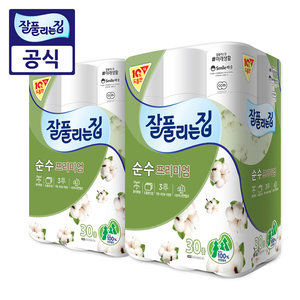

In [90]:
img_obj